In [253]:
# Importing the necessary modules

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
# Let's read the earthquakes data
eq = pd.read_csv('all_month.csv')

# I'll look into the info to see if I come up with any ideas
# visualise some of this stafff
eq.info()


In [ ]:
# Some general statistics about the dataframe may come in handy
eq.describe()

In [61]:
# This set of code will act like a sketchbook. I'll be going through ideas and see what will be used of that.
# I'll still keep notes above every step, since that will be useful for whoever
# reads just this code without the slides. Thank you.

In [270]:
# We shall take a look at the number o null entries for each category

eq.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                1488
gap                1488
dmin               3479
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    2473
depthError            1
magError           1785
magNst             1496
status                0
locationSource        0
magSource             0
dtype: int64

In [271]:
# Here we will try to do some basic cleaning by droping every row that has null entries 

eq2 = eq.dropna()
eq2.info()

# This wipes away half the entries, so maybe there's a better way of cleaning.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5585 entries, 5 to 10333
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             5585 non-null   object 
 1   latitude         5585 non-null   float64
 2   longitude        5585 non-null   float64
 3   depth            5585 non-null   float64
 4   mag              5585 non-null   float64
 5   magType          5585 non-null   object 
 6   nst              5585 non-null   float64
 7   gap              5585 non-null   float64
 8   dmin             5585 non-null   float64
 9   rms              5585 non-null   float64
 10  net              5585 non-null   object 
 11  id               5585 non-null   object 
 12  updated          5585 non-null   object 
 13  place            5585 non-null   object 
 14  type             5585 non-null   object 
 15  horizontalError  5585 non-null   float64
 16  depthError       5585 non-null   float64
 17  magError     

In [44]:
# It might be better to fill the null entries with the most frequent entry
# so we don't lose too much info.


# So let's find the most common entry for each category, but only the numeric ones
# I'll try to experiment with mean median and mod and try to fill the null entries with one of those

eqmean= eq.mean(axis=0, numeric_only=True, skipna=True)
eqmediany= eq.median(axis=0, numeric_only=True, skipna=True)
eqmode= eq.mode(axis=0, numeric_only=True, dropna=True)


In [ ]:
# I've also read about imputation, but not quite sure how to do that yet.

In [ ]:
# Here is how to fill the entries with the mean of each column for example.
# Not sure I'm gonna use that though since it's not that scientific.

eq.fillna(eqmean, inplace = True)


In [101]:
# Here we assign the how many counts each type of earthquake shows up
# We can use it later to make a plot.

type_counts  = eq2['type'].value_counts()
type_counts

earthquake            5429
quarry blast            83
explosion               72
chemical explosion       1
Name: type, dtype: int64

In [272]:
# Here we clean the 'mag' column a bit, removing any null entries
# It was exaclty one, so it's safe to just remove it

mag_counts = eq['mag'].value_counts()
eq['mag'].isnull().sum()
eq['mag'].dropna()




0        2.20
1        2.17
2        0.36
3        2.53
4        1.50
         ... 
10330    4.20
10331    2.10
10332    0.90
10333    4.60
10334    0.40
Name: mag, Length: 10334, dtype: float64

Text(0.5, 1.0, 'test plot')

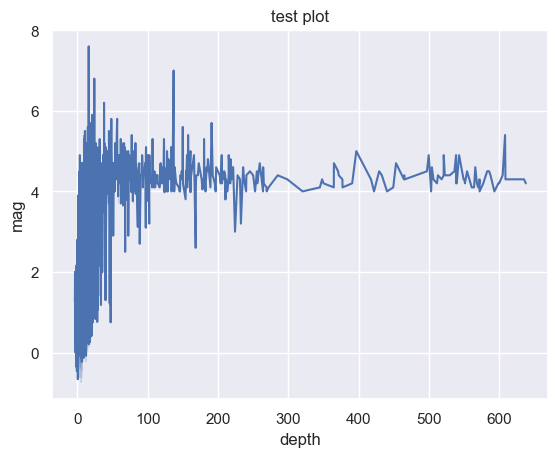

In [127]:
# We should do some of the required plots though, so let's get to it.
# This is a line plot that compares magnitude to depth of the earthquake.

sns.set_theme()
sns.lineplot(y="mag", x='depth', data=eq2)
plt.title('test plot')


In [156]:
# Made an objervation about source and error
# but don't know how to show it. The observation is that
# the 'ak' location source, never enters horizontal Error, mag Error and magNst.
# Maybe a plot can be used to signifie how many null entries each location source has.
# So a human error can possibly be detected.
# Maybe a pie chart with missing value counts maybe?


In [ ]:
# So here we did the same thing with the 'types' above.
# Only this time we keep the names of the places in a seperate variable
# These will be used in the pie below.

ls_counts = eq['locationSource'].value_counts()
print(ls_counts)

ls_labels = eq.locationSource.unique()


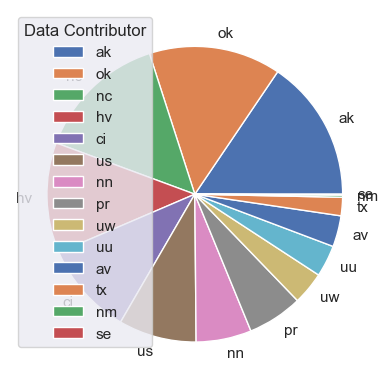

In [217]:
# Pie plot. Nobody likes pie charts and now I see why
# Aesthetically i couldn't find a work around for distancing the legend.
# and we have some overlapping as well. Didn't find parameter in definition.

# Let's use location centers and amount of eathquake detections.

fig1= plt.pie(ls_counts, labels = ls_labels ,)
plt.legend(title = 'Data Contributor')
plt.show()

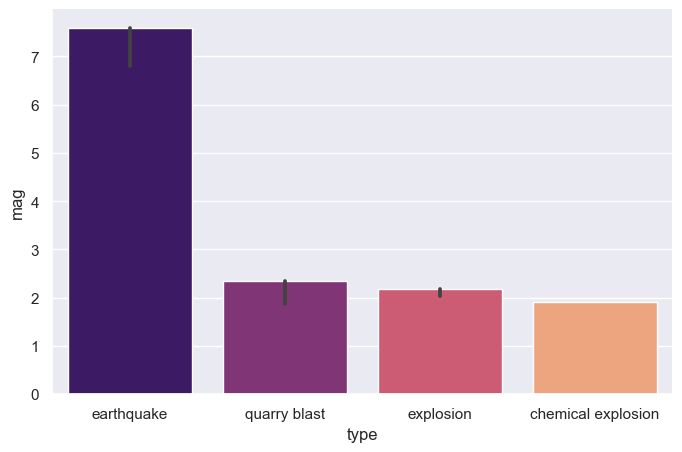

In [218]:
# Let's do a bar graph here. We will use the magnitude and the type of the earthquake

f, ax = plt.subplots(figsize = (8, 5))
sns.despine(f)

# If we don't use an estimator, default is mean)
fig2 = sns.barplot(x='type', y='mag', data=eq2, palette='magma', estimator=max)

Text(0.5, 1.0, 'Magnitude and Sensors relationship')

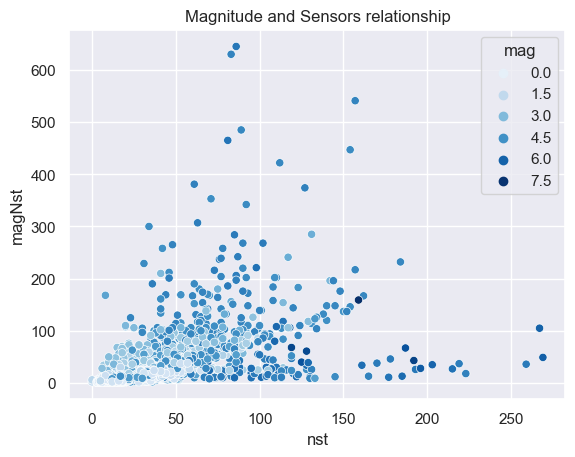

In [219]:
# Let's do our scatter plot here. We will use the location sensors and the magnitude sensors
# in corellation with the magnitude as hue.

fig3 = sns.scatterplot(y='magNst', x='nst', hue='mag', data=eq2, palette='Blues')
plt.title('Magnitude and Sensors relationship')


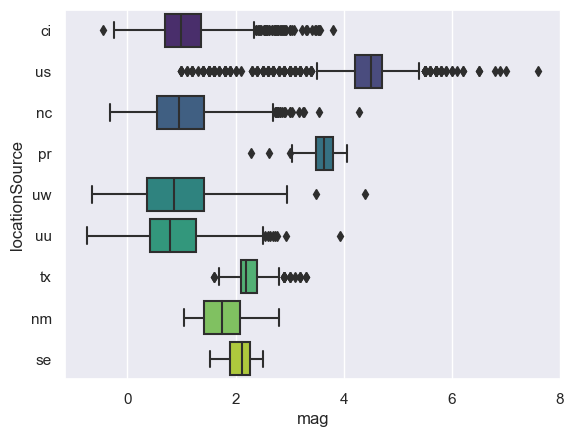

In [220]:
# A box plot is the last requirement. So let's make one of these here
# This is the magnitudes recorded by each location source

fig4 = sns.boxplot(x=eq2['mag'], y=eq2['locationSource'], palette='viridis')
plt.show()


In [ ]:
# Now, for some extra experemintation, let's try geopandas
# We'll try to create a map with the earthquakes and if possible
# a heat map with the magnitudes

fig = px.scatter_geo(eq2, lat='latitude', lon='longitude', hover_name="mag")
fig.update_layout(title = 'Observed Earthquakes',title_x=1)
fig.show()

# The above didn't work because of some missing installation which I don't get..I'll try it on a later time
# Commenting for safe keeping

<AxesSubplot: >

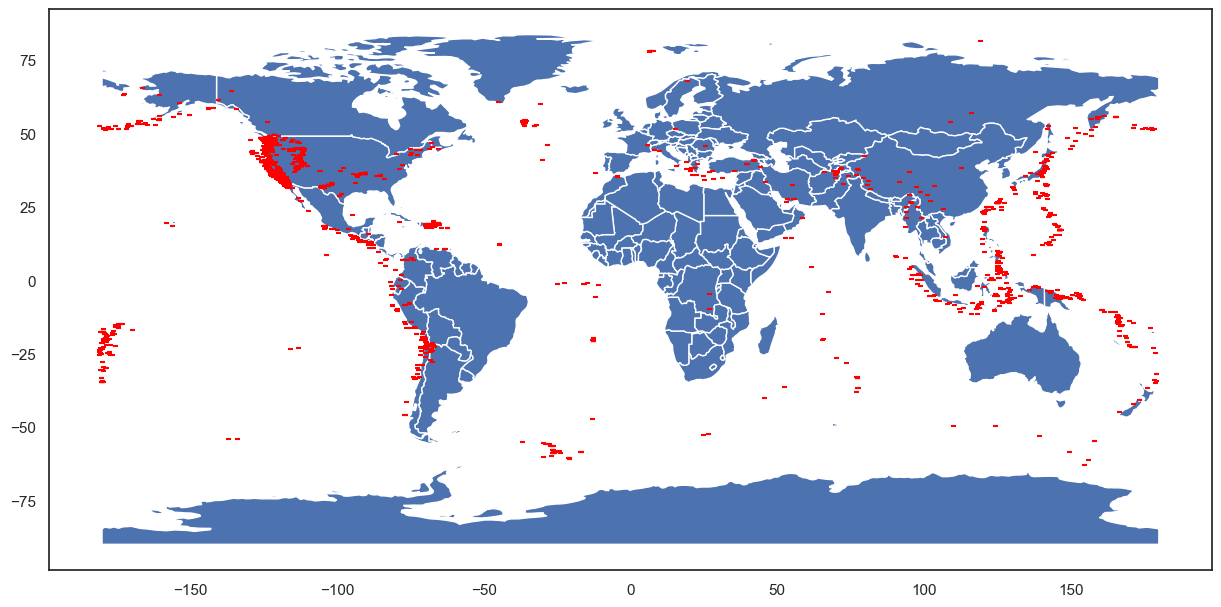

In [267]:
geometry = [Point(xy) for xy in zip(eq2['longitude'],eq2['latitude'])]
gdf = GeoDataFrame(eq2, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15,15)),marker=0,color='red',markersize=15)

In [268]:
# Final comments. 
# Needs improvements which are based on documentation and further
# reding into how to shape and customise each plot whoever you want
